In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow import keras
from tensorflow.keras import layers
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix

In [ ]:
dataset_train = pd.read_csv('/content/train.csv', sep = ',')
dataset_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
dataset_test = pd.read_csv('/content/test.csv', sep = ',')
dataset_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
dataset_y = pd.read_csv('/content/gender_submission.csv', sep = ',')
dataset_y.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
print(f"Shape treino: {dataset_train.shape}")
print(f"Shape teste: {dataset_test.shape}")
print(f"Shape y: {dataset_y.shape}")

Shape treino: (891, 12)
Shape teste: (418, 11)
Shape y: (418, 2)


In [ ]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [ ]:
dataset_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [ ]:
dataset_train.isnull().sum().sort_values(ascending=False)

,0
Cabin,687
Age,177
Embarked,2
PassengerId,0
Name,0
Pclass,0
Survived,0
Sex,0
Parch,0
SibSp,0


In [ ]:
dataset_test.isnull().sum().sort_values(ascending=False)

,0
Cabin,327
Age,86
Fare,1
Name,0
Pclass,0
PassengerId,0
Sex,0
Parch,0
SibSp,0
Ticket,0


In [ ]:
dataset_y.isnull().sum().sort_values(ascending=False)

,0
PassengerId,0
Survived,0


In [ ]:
dataset_y = dataset_y.drop(['PassengerId'], axis = 1)
dataset_y.head()

,Survived
0,0
1,1
2,0
3,0
4,1


In [ ]:
dataset_train = dataset_train.drop(['PassengerId','Name','Ticket', 'Cabin'], axis = 1)
dataset_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
dataset_test = dataset_test.drop(['PassengerId','Name','Ticket', 'Cabin'], axis = 1)
dataset_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [ ]:
dataset_train['Age'] = dataset_train.Age.fillna(dataset_train.groupby(['Pclass','Sex'])['Age'].transform('median'))
dataset_test['Age'] = dataset_test.Age.fillna(dataset_test.groupby(['Pclass','Sex'])['Age'].transform('median'))

dataset_train.loc[dataset_train.Embarked.isnull(),'Embarked'] = dataset_train.Embarked.mode()[0]
dataset_test.loc[dataset_test.Embarked.isnull(),'Embarked'] = dataset_test.Embarked.mode()[0]

dataset_train.loc[dataset_train.Fare.isnull(),'Fare'] = dataset_train.Fare.mean()
dataset_test.loc[dataset_test.Fare.isnull(),'Fare'] = dataset_test.Fare.mean()

dataset_train['Family_Size'] = dataset_train['SibSp'] + dataset_train['Parch'] + 1
dataset_test['Family_Size'] = dataset_test['SibSp'] + dataset_test['Parch'] + 1

In [ ]:
dataset_train.isnull().sum().sort_values(ascending=False).head(5)

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0


In [ ]:
dataset_test.isnull().sum().sort_values(ascending=False).head(5)

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0


In [ ]:
dataset_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size
0,0,3,male,22.0,1,0,7.2500,S,2
1,1,1,female,38.0,1,0,71.2833,C,2
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,2
4,0,3,male,35.0,0,0,8.0500,S,1


In [ ]:
dataset_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size
0,3,male,34.5,0,0,7.8292,Q,1
1,3,female,47.0,1,0,7.0000,S,2
2,2,male,62.0,0,0,9.6875,Q,1
3,3,male,27.0,0,0,8.6625,S,1
4,3,female,22.0,1,1,12.2875,S,3


In [ ]:
cont_sex = dataset_train.groupby(['Sex', 'Survived']).size().unstack()
cont_sex['Total'] = cont_sex.sum(axis=1)
porcent_sex = (cont_sex[1] / cont_sex['Total']) * 100
cont_sex['sobrevivevtes %'] = porcent_sex
mean_sex = dataset_train.groupby('Sex')['Survived'].mean()
cont_sex['Mean'] = mean_sex
print(cont_sex)

Survived    0    1  Total  sobrevivevtes %      Mean
Sex                                                 
female     81  233    314        74.203822  0.742038
male      468  109    577        18.890815  0.188908


In [ ]:
mortes_por_pclass =dataset_train.groupby(['Pclass', 'Survived']).size().unstack()
mortes_por_pclass['Total'] = mortes_por_pclass.sum(axis=1)
porcent_mortes = (mortes_por_pclass[1] / mortes_por_pclass['Total']) * 100
mortes_por_pclass['sobreviventes %'] = porcent_mortes

print(mortes_por_pclass)

Survived    0    1  Total  sobreviventes %
Pclass                                    
1          80  136    216        62.962963
2          97   87    184        47.282609
3         372  119    491        24.236253


In [ ]:
categorias = ['S', 'C', 'Q']
orc = OrdinalEncoder(categories=[categorias], dtype = 'int32')
orc = orc.fit(dataset_train[['Embarked']])

dataset_train['Embarked'] =orc.transform(dataset_train[['Embarked']])
dataset_test['Embarked'] =orc.transform(dataset_test[['Embarked']])

In [ ]:
dataset_train['sex_binario'] = dataset_train.Sex.apply(lambda x: 1 if x == 'male' else 0)
dataset_test['sex_binario'] = dataset_test.Sex.apply(lambda x: 1 if x == 'male' else 0)

dataset_train = dataset_train.drop(['Sex'], axis = 1)
dataset_test = dataset_test.drop(['Sex'], axis = 1)
dataset_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Family_Size,sex_binario
0,0,3,22.0,1,0,7.2500,0,2,1
1,1,1,38.0,1,0,71.2833,1,2,0
2,1,3,26.0,0,0,7.9250,0,1,0
3,1,1,35.0,1,0,53.1000,0,2,0
4,0,3,35.0,0,0,8.0500,0,1,1


In [ ]:
dataset_test.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Family_Size,sex_binario
0,3,34.5,0,0,7.8292,2,1,1
1,3,47.0,1,0,7.0000,0,2,0
2,2,62.0,0,0,9.6875,2,1,1
3,3,27.0,0,0,8.6625,0,1,1
4,3,22.0,1,1,12.2875,0,3,0


In [ ]:
print(f"Shape treino: {dataset_train.shape}")
print(f"Shape teste: {dataset_test.shape}")

Shape treino: (891, 9)
Shape teste: (418, 8)


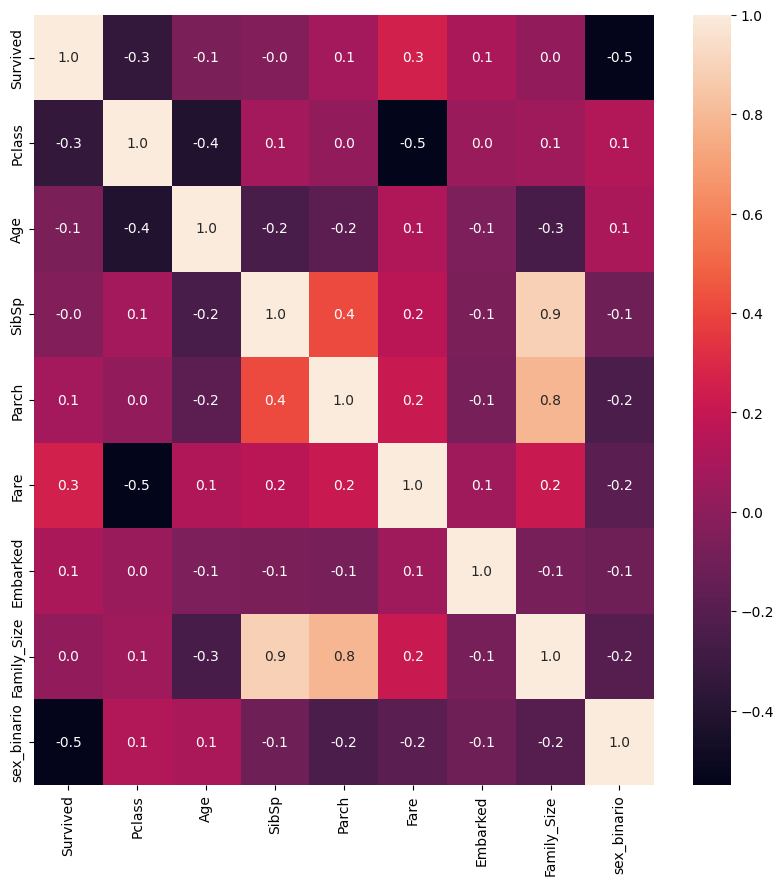

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset_train.corr(), annot=True, fmt='.1f')
plt.show()

In [ ]:
# Separando features (X) e rótulo (y)
X = dataset_train.drop('Survived', axis = 1)
y = dataset_train['Survived']
X_test = dataset_test
y_test = dataset_y

scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_val, y_train, y_val = train_test_split(X_norm, y, test_size=0.2, random_state=42)

print("\n--- Shape dos dados após as divisões ---")
print(f"Conjunto de Treinamento: X_train.shape = {X_train.shape}, y_train.shape = {y_train.shape}")
print(f"Conjunto de Validação: X_val.shape = {X_val.shape}, y_val.shape = {y_val.shape}")
print(f"Conjunto de Teste: X_test.shape = {X_test.shape}, y_test.shape = {y_test.shape}")


--- Shape dos dados após as divisões ---
Conjunto de Treinamento: X_train.shape = (712, 8), y_train.shape = (712,)
Conjunto de Validação: X_val.shape = (179, 8), y_val.shape = (179,)
Conjunto de Teste: X_test.shape = (418, 8), y_test.shape = (418, 1)


In [ ]:
'''scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)'''

'scaler = MinMaxScaler()\nX_train = scaler.fit_transform(X_train)\nX_val = scaler.transform(X_val)\nX_test = scaler.transform(X_test)'

In [ ]:
print("--- Distribuição das classes antes do balanceamento ---")
print(pd.Series(y_train).value_counts())

# Inicializando o SMOTE. O 'random_state' garante a reprodutibilidade.
smote = SMOTE(random_state=42)

# Aplicando o SMOTE APENAS aos dados de treino
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("\n--- Distribuição das classes após o balanceamento com SMOTE ---")
print(pd.Series(y_train_res).value_counts())

--- Distribuição das classes antes do balanceamento ---
Survived
0    444
1    268
Name: count, dtype: int64

--- Distribuição das classes após o balanceamento com SMOTE ---
Survived
0    444
1    444
Name: count, dtype: int64


In [ ]:
model = keras.Sequential([
    # A camada de entrada é a primeira camada densa
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),  # Adiciona uma camada de Dropout para evitar overfitting
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    # A camada de saída tem 1 neurônio e ativação 'sigmoid' para classificação binária
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Treinamento do modelo
print("\n--- Iniciando o treinamento do modelo ---")
history = model.fit(X_train_res, y_train_res,
                    epochs=200,
                    batch_size=16,
                    validation_data=(X_val, y_val),
                    verbose=0)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



--- Iniciando o treinamento do modelo ---



--- Avaliação do Modelo ---
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Matriz de Confusão:


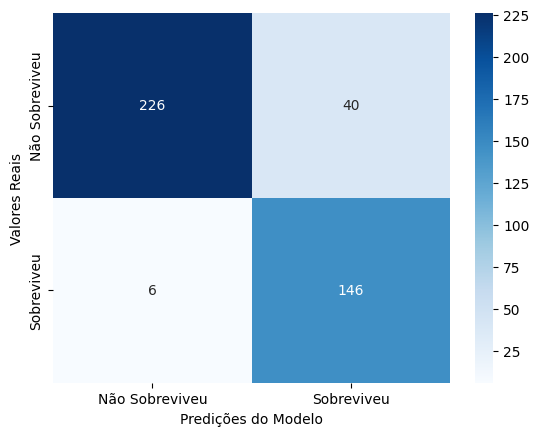


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.97      0.85      0.91       266
           1       0.78      0.96      0.86       152

    accuracy                           0.89       418
   macro avg       0.88      0.91      0.89       418
weighted avg       0.91      0.89      0.89       418



In [ ]:
print("\n--- Avaliação do Modelo ---")
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype("int32")

# Matriz de Confusão e Relatório de Classificação
print("Matriz de Confusão:")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Sobreviveu', 'Sobreviveu'],
            yticklabels=['Não Sobreviveu', 'Sobreviveu'])
plt.ylabel('Valores Reais')
plt.xlabel('Predições do Modelo')
plt.show()

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

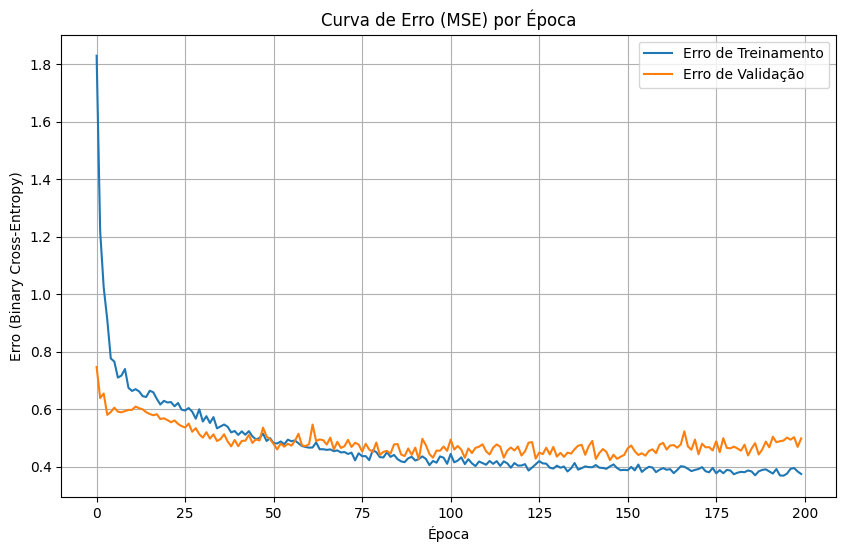

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Erro de Treinamento')
plt.plot(history.history['val_loss'], label='Erro de Validação')
plt.title('Curva de Erro (MSE) por Época')
plt.xlabel('Época')
plt.ylabel('Erro (Binary Cross-Entropy)')
plt.legend()
plt.grid(True)
plt.show()